# FROM TERMINAL, RUN THIS LINE:
jupyter nbconvert --execute --to html CRYPTO_MODEL_AUTOGEN.ipynb

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
from model import MODEL
import utils, plotting, statistics
import pandas as pd

In [3]:
#your intra-day time at which to evaluate the model.
day_hour = 18
#your tickers of interest
tickers = ['BTC-USD']

In [4]:
#do not edit this cell!
todays_date = pd.Timestamp.today()
start_date = todays_date - pd.Timedelta('200 days')
filter_date = start_date.floor(freq='D').replace(hour=day_hour)

In [5]:
#do not edit this cell!
#get data:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')
#filter by datetime:
date_range = utils.create_date_range(start_date=filter_date)
model.apply_date_filter(date_range, force_apply=True)

[*********************100%***********************]  1 of 1 completed
[INFO]: filter applied.


In [6]:
model.eval_model()

|                                 PRICE MODEL                                  |
|                                 Version 0.3                                  |
|                  Authors: Marco Rosenzweig & Patrick Lorenz                  |
--------------------------------------------------------------------------------
|                             ticker = ['BTC-USD']                             |
|                            start date = 12/04/19                             |
|                             end date = 06/20/20                              |
|                     initial investment per ticker = 200                      |
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
********************************************************************************
[TICKER]: BTC-USD
[INFO]: No tax paid.
--------------------------------------------------------------------------------
[SUMMARY]: Average trade win: 5.8322858984%
[SUMMARY]: Aver

In [7]:
plot_date = todays_date - pd.Timedelta('30 days')
plot_start = str(plot_date.date())

[INFO]: New sell signal was detected for last value: 9255.1494140625.


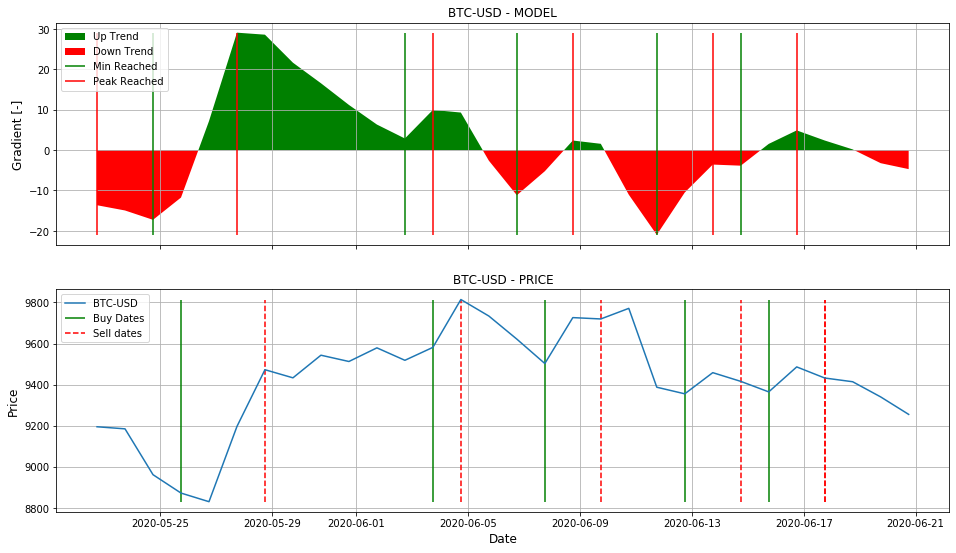

In [8]:
plotting.plot_model(model, tickers='BTC-USD', plot_from_date=plot_start)

In [9]:
imag_model = model.copy_model()
imag_model.append_timedelta(timedelta=1)
imag_model.comp_break_values(tickers='all', parallel_computing=True)
imag_model._init_model()

[INFO]: New data was appended.
[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Using 10 processes.
[INFO]: Current values: {'BTC-USD': 9255.1494140625}
[INFO]: Break values: {'BTC-USD': array([9194.06542793, 9240.341175  ])}
[INFO]: Tolerances: {'BTC-USD': array([-61.08398613, -14.80823906])}
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
********************************************************************************


[INFO]: Current ticker: BTC-USD
--------------------------------------------------------------------------------
[INFO]: Result for value: 9079.139610080314
[INFO]: New sell signal was detected for last value: 9079.139610080314.


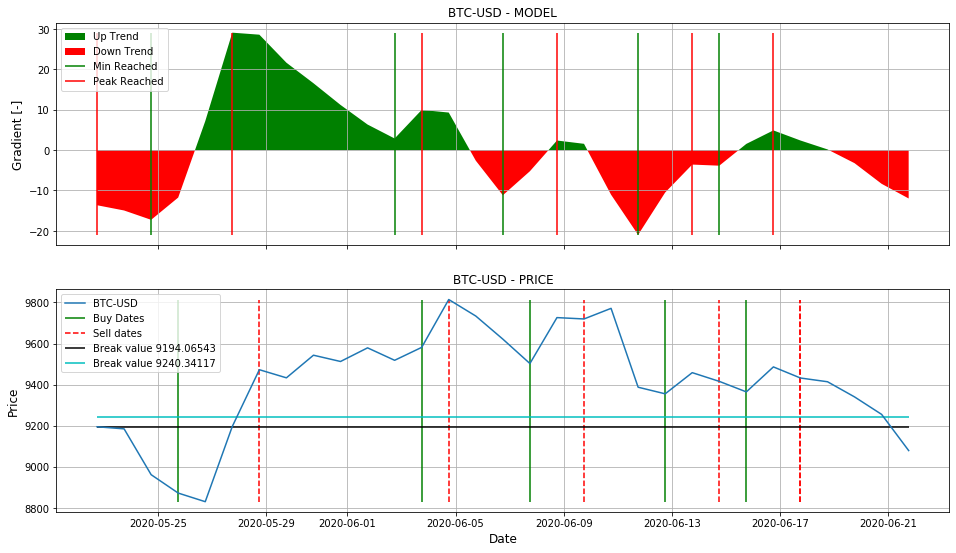

--------------------------------------------------------------------------------
[INFO]: Result for value: 9217.203301464586


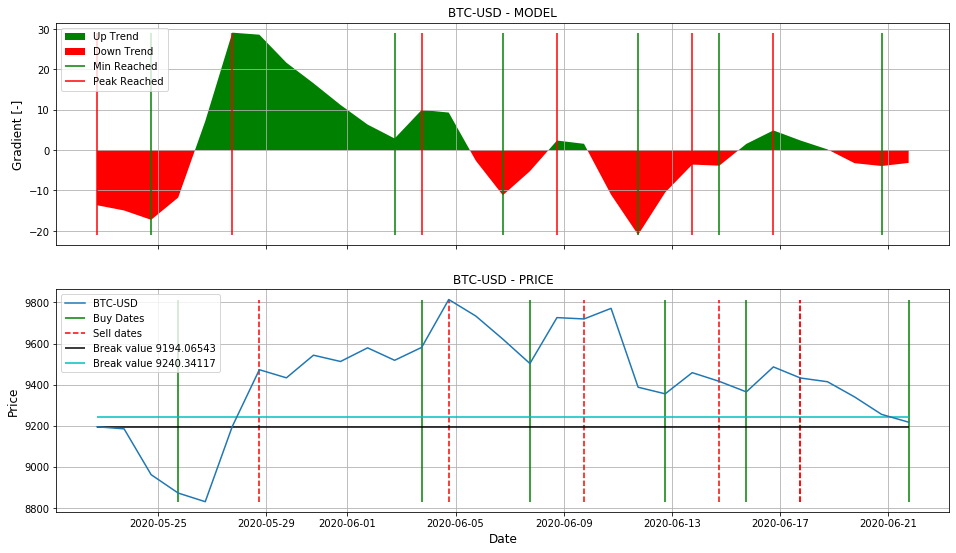

--------------------------------------------------------------------------------
[INFO]: Result for value: 9355.845439687238


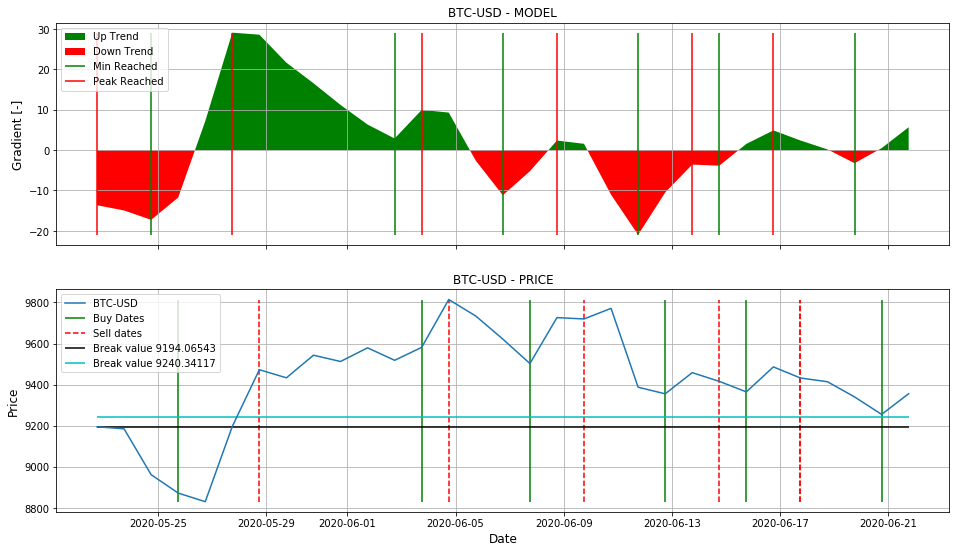

In [10]:
imag_model.show_possibilities(plot_from_date=plot_start, switch_axes=False)

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 9359.2822265625!
[STATS-INFO]: New tolerances: [-165.21679863 -118.94105156]!
[STATS-EVAL]: Probability for tol=-165.21680: 0.89%
[STATS-EVAL]: Probability for tol=-118.94105: 4.42%
[STATS-EVAL]: Probability between: 3.53%


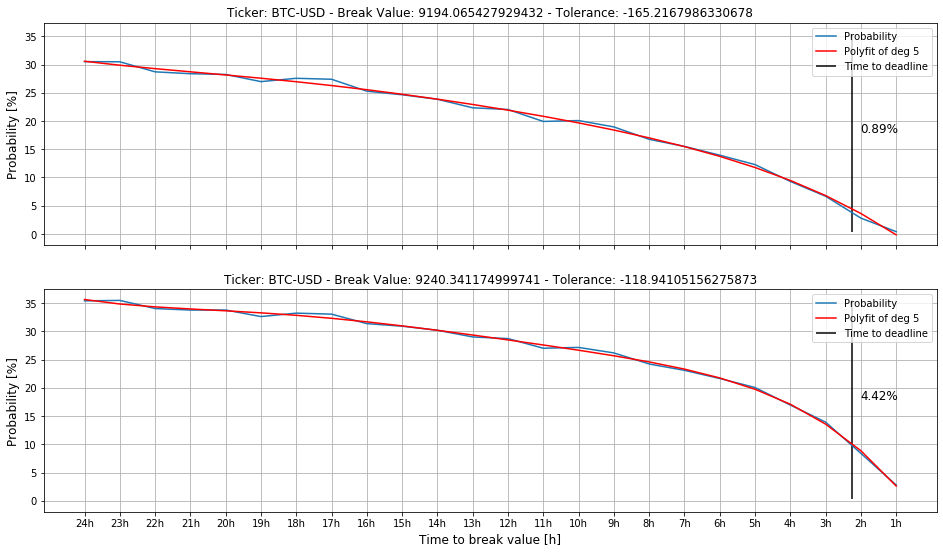

In [11]:
statistics.calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)